# Final Project

___

### Overview:

* **Name**:  <span style="color:blue">Moe Thiri ZUN</span>
* **Student number**:  <span style="color:blue">6530-34-4544</span>
* **Project theme**:  <span style="color:blue">Hourly Energy Consumption of a Household</span>

<br>

# Purpose:

* The purpose of this Final Project is to determine the factors that contribute to daily energy consumption of a household.
* The key **dependent variable** (DV) is total daily energy consumption, a combination of appliances load (in Wh) and lights load (in Wh)
* Key **independent variables** (IVs) include:
    * T1, Temperature in kitchen area, in Celsius
    * RH_1, Humidity in kitchen area, in %
    * T2, Temperature in living room area, in Celsius
    * RH_2, Humidity in living room area, in %
    * T3, Temperature in laundry room area
    * RH_3, Humidity in laundry room area, in %
    * T4, Temperature in office room, in Celsius
    * RH_4, Humidity in office room, in %
    * T5, Temperature in bathroom, in Celsius
    * RH_5, Humidity in bathroom, in %
    * T6, Temperature outside the building (north side), in Celsius
    * RH_6, Humidity outside the building (north side), in %
    * T7, Temperature in ironing room , in Celsius
    * RH_7, Humidity in ironing room, in %
    * T8, Temperature in teenager room 2, in Celsius
    * RH_8, Humidity in teenager room 2, in %
    * T9, Temperature in parents room, in Celsius
    * RH_9, Humidity in parents room, in %
    * To, Temperature outside (from Chievres weather station), in Celsius
    * Pressure (from Chievres weather station), in mm Hg
    * RH_out, Humidity outside (from Chievres weather station), in %
    * Wind speed (from Chievres weather station), in m/s
    * Visibility (from Chievres weather station), in km
    * Tdewpoint (from Chievres weather station), °C
* This dataset contains 19735 cases (i.e., data collection for 4.5 months with 10 minute timestep). Each cases has values for all IVs as well as the DV. The timestep analyzed will be in terms of one hour. 
<br>

### Dataset source:

The data come from the [Appliance Energy Prediction Data Set](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) dataset from the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/index.php):

The data are available for download [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00374/).

Analyses of this dataset have been published previously in Candanedo et al. (2017).


#### References:

Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix, Data driven prediction models of energy use of appliances in a low-energy house, Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788
doi: [10.1016/j.enbuild.2017.01.083](https://doi.org/10.1016/j.enbuild.2017.01.083)


## Importing script and loading data

In [1]:
# Import the hypothesis_ml class from the myscript module
from myscript import hypothesis_ml

# Create an instance of the class and pass in the filepath
filepath = "energydata_complete.csv"
fp = hypothesis_ml(filepath)

# Load the data and add the appliances and light load together
df = fp.load()


## Visualizing the Variables

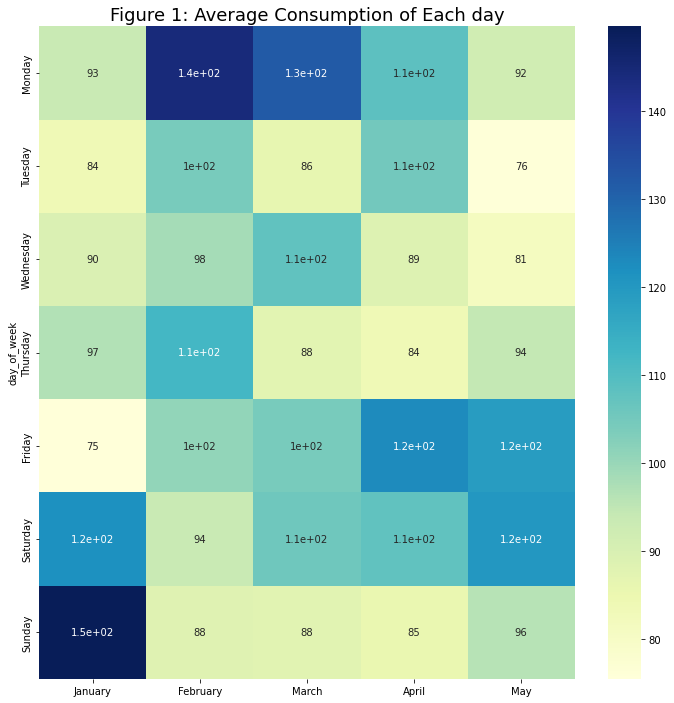

In [2]:
# Plot
fp.consumption_plot()
# Resample
fp.resample()

As in the Figure 1, There is **no consistent pattern** for the rise in the consumption for five months of collected data. 

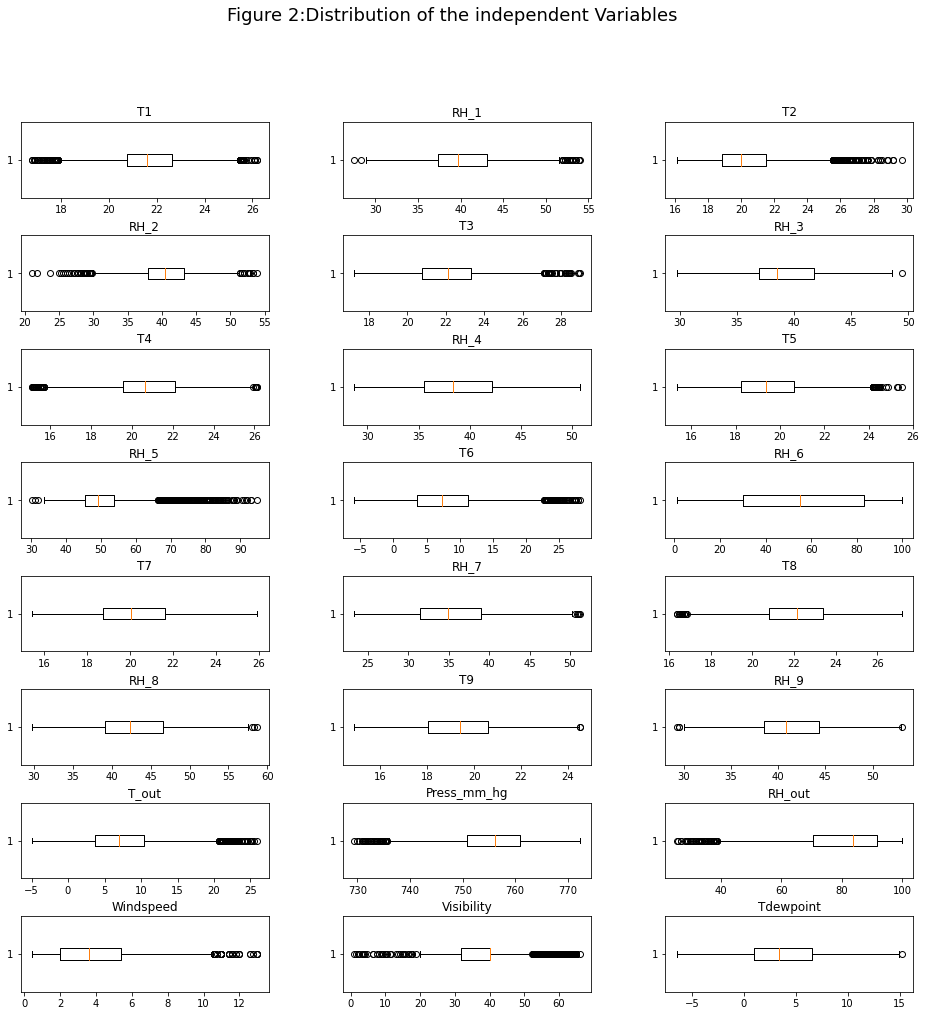

In [3]:
# Visualizing the Distribution of each independent varaible
fp.distribution()

<br>

## First Hypothesis Test: ANOVA

This hypothesis test is applied in order to test whether there is a significant difference among the temperature variables and the relative humidity variables  in different locations of the house.

<br>

In [4]:
fp.ANOVA()

ANOVA Test for Temperature
P-value: 0.0
Reject the null hypothesis. There is a significant difference between the temperatures.

ANOVA Test for Relative Humidity
P-value: 0.0
Reject the null hypothesis. There is a significant difference between relative humidity.


<br>

## Second Hypothesis Test: Linear and Pearson Test

This hypothesis test is applied in order to test whether there is a strong linear relation and correlation between each independent variable and the dependent varible.

<br>

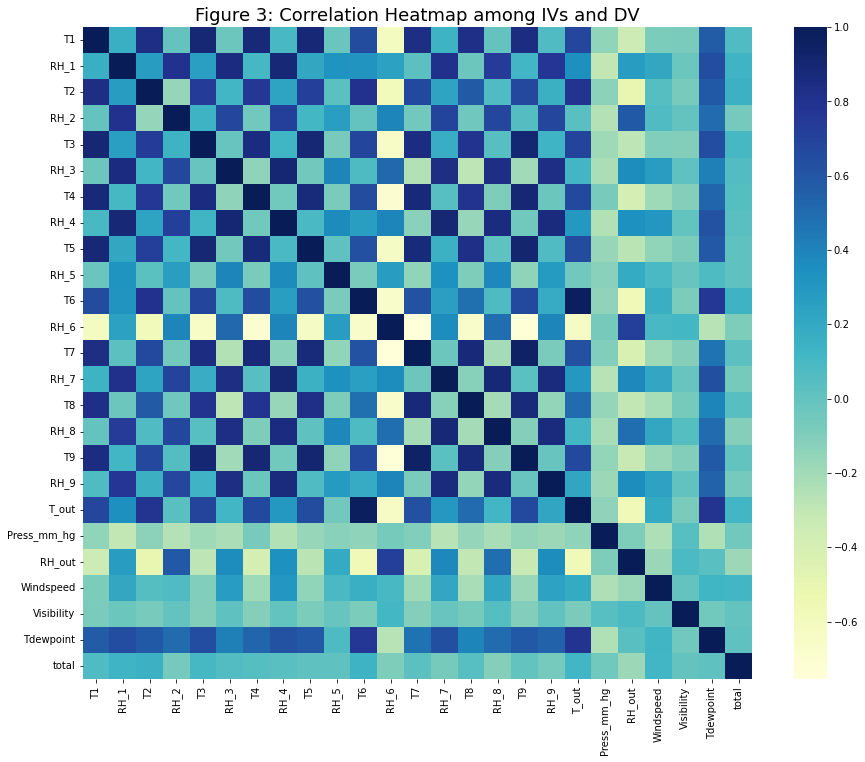

The independent variable that do not have correlation with the dependent variable are


['RH_4', 'T5', 'RH_5', 'T7', 'T9', 'Visibility', 'Tdewpoint']

In [5]:
# Hypothesis: Linear relationship
fp.linear_test()
# Visualization: Correlation among variables
fp.corr()
# Hypothesis: Pearson correlation between independent variables and the dependent variable
fp.pearson_test()


In [6]:
# drop the variables with no correlation
fp.clean()

<br>

## First Machine learning: Multiple Linear Relationship
Linear regression machine learning is applied among the rest of IV's and DV for futher prediction. Mean absolute error is used as an indicator to evaluate the model. The baseline indicator comes from the mean total load. The difference between the baseline model and the trained model can be seen in the following figures.

<br>

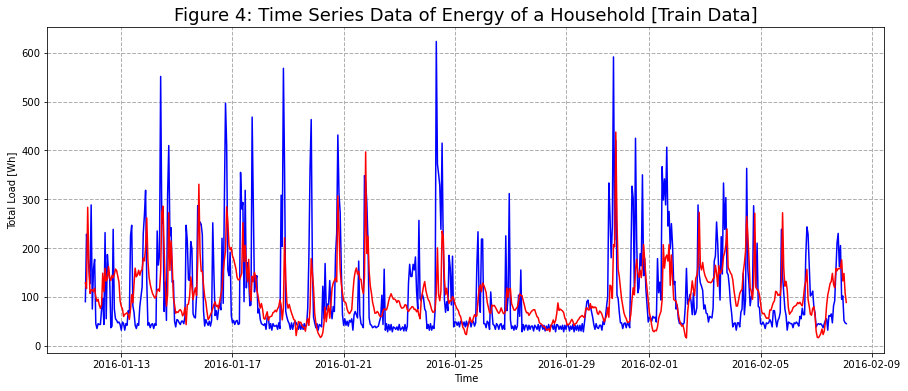

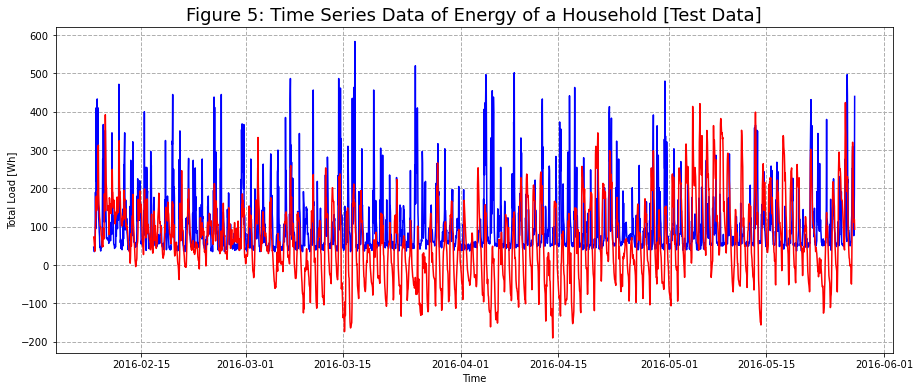

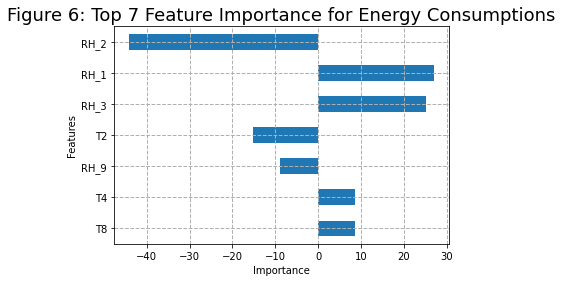

,Mean Absolute Error
Baseline,71.794
Training,54.825
Testing,87.699


In [7]:
fp.linear_regression()

From Figure 4 and 5, although the linear regression model works well with training data, it cannot predict the test data well enough. According to the mean absolute error data table, the MAE of testing data is around 60% higher than that of the training data. Therefore, it can be concluded that multiple regression model is not a great fit for this data.

From Figure 6, RH_2, T2 and RH_9 plays a role to lower the average consumption while RH_1, RH_3, T4 and T8 can raise the consumption.

<br>

## Second Machine learning: Support Vector Regression (SVR)
SVR machine learning is applied together with preprocesssing - standard scaler to scale the features to unit variance and dimensionality reduction - PCA to reduce from 1 to 16 componenets (< than the total number of X_train)

In this step kernel - linear, second order poly and rbf with n_compnents are applied to initiate and search for the best hyper parameters with the least mean absolute error for test set.

<br>

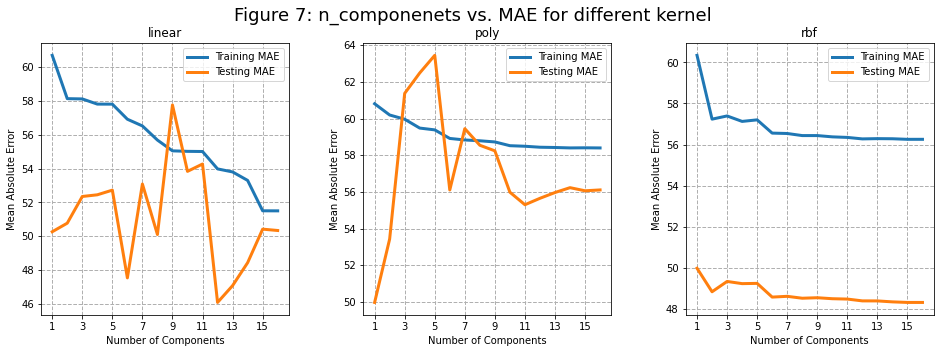

,kernel,n_components,MAE Training,MAE Testing
11,linear,12,53.977404,46.083066
12,linear,13,53.798314,47.077896
5,linear,6,56.914303,47.534887
47,rbf,16,56.255308,48.321231
46,rbf,15,56.254737,48.321588
45,rbf,14,56.282904,48.349446
44,rbf,13,56.288558,48.395562


In [8]:
fp.SVR_testing()

From figure 7 and table, the best hyper parameter is kernel = linear with n_component = 12 with the least MAE of 46. These parameters will be used to train the model again for further prediction.

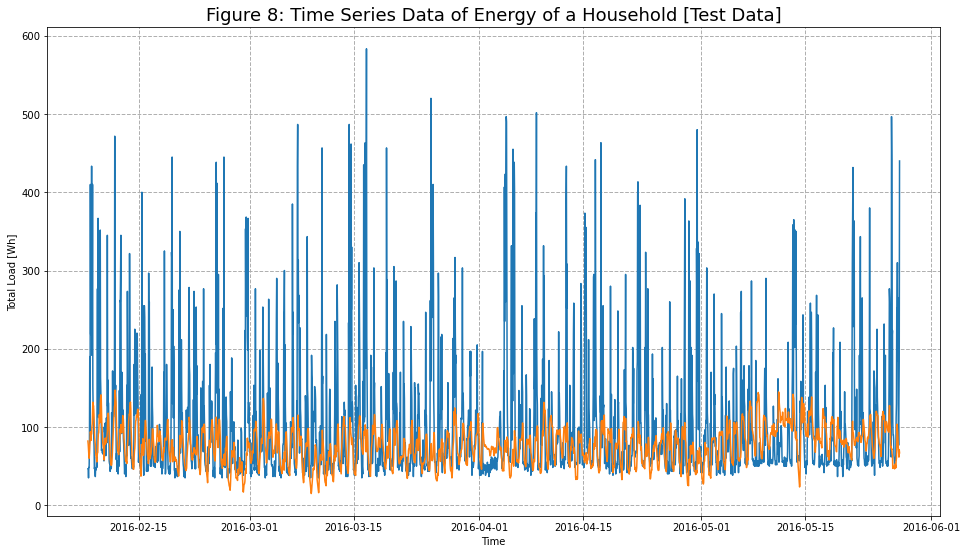

In [9]:
fp.SVR()

## Conclusion
Although SVR model can predict better than multiple linear regression from the view point of mean absolute error, its fluctations is around 100 kWh without being able to reach up the actual peak. 

TOTAL: ( 20.1 / 24 )

 

Project organization ( 8 / 8 ):

Notebook organization

Overall excellent organization

Very good use of sections, figures and a script to clearly organize material

Script / module organization (optional):

Excellent use of a script, especially including the use of a custom class to hide variables and other unnecessary objects from the notebook's namespace. Excellently done! (You are the only student to have used class this year; you have used it very effectively!)

Minor suggestion: use a slightly more informative file name than 'myscript.py' (for example: "myanalysis.py")

I also suggest:

User UpperCase for class names like this: HypothesisML and a related lower-case name for objects of that class like this: hml = HypothesisML(filepath)

Organize the class methods into a clearer order. Either use alphabetical order (my recommendation) or use a clearly sectioned order, where similar methods are grouped together (e.g. all hypothesis testing methods grouped together).

Comment the main attributes (i.e., those defined in __init__ )

Several of these are difficult to understand, especially: nlr and no_corr

Use lower-case for all method names: anova not ANOVA , svr_testing not SVR_testing and svr not SVR

Using linear_regression is non-ideal for a method name because it appears to be simple linear regression and not machine learning. A name like linear_regression_ml or something like that would be clearer.

Only include attributes that are common to most of the analyses:

df is excellent because it is used in all methods

nlr and no_corr and X_train, etc.are not good attributes because they are each used in only a few methods; for this reason it may be preferable to use an alternative class system like this:

# In the module:
​
class HypothesisTester(object):
 def __init__(self, dataframe):
   self.df = dataframe
   ...
​
class MLAnalyzer(object):
 def __init__(self, dataframe):
   self.df = dataframe
   ...
​
def load_and_clean_data( filepath ):
 df = pd.read_csv( ... )
 return df
​
​
# In the notebook:
​
from myscript import load_and_clean_data, HypothesisTester, MLAnalyzer
​
df  = load_and_clean_data( filepath )
ht  = HypothesisTester( df )
mla = MLAnalyzer( df )
An organization like this would make the module easier to understand and read

Markdown cell effectiveness

Very good, but too brief in spots; points are deducted below so no additional points are deducted here

Code cell effectiveness

Excellent! See also comments regarding potential class improvements above.

Information density

Very good density, but additional text descriptions are required in places. See below for specific comments. Points are deducted below so no additional points are deducted here

Code density

Excellent! Your notebook code is minimal and easy to read. Your module is also very well organized.

There are a few minor code issues; no points are deducted, but be careful in future coding!

hypothesis_ml.load: two return self.df statements

hypothesis_ml.load: no need for assert c == 0 ; this load method is specific to the data file; using assert is useful only for generic file processing. Using assert is also useful for development purposes, but should not be included in a final report

 

 

Data description ( 3 / 4 ):

Data file parsing

Very good data parsing, including a relatively simple Pandas read command, but also non-trivial and very important data cleaning.

Effectiveness

Very effective, well-colored figures

Reporting density

Very good figure density

(-0.5) Insufficient text information. Text descriptions (in Markdown) shoud be used to highlight the key points that the figures make.

Understandability

(-0.2) Use of fp.resample() is unclear: you should explain the purpose of this command or exclude it

(-0.3) Figure 2 is a bit difficult to understand for several reasons:

No units are provide for the x axes

The meaning of "1" on the vertical axis is unclear; this "1" should probably be deleted using ax.set_yticklabels([])

Similar variables should be grouped together better.

It would be preferable to group all "T" variables together (possibly in one figrue) and all "RH" variables together (possibly in a separate figure); this would also improve density because the x axes needn't be repeated; all "T" data could be presented in a single axes object, thereby making all "T" groups much easier to visually compare

As above, text descriptions are required to make the figrues more understandable.

 

Hypothesis testing ( 5.1 / 6 ):

Procedures

Acceptable use of two different (albeit simple) hypothesis testing procedures

Analysis quality

Very good

(-0.2) Based on the figure presented it is unclear what criterion is used to justify this statement:

"The independent variable that do not have correlation with the dependent variable are..."

In "myscript.py" the criterion is clear as p > 0.05, but this should be stated in the report.

Very importantly, p > 0.05 does NOT imply "no correlation", it instead implies just "no significant correlation"

Reporting density

Very good

(-0.2) Some important details are missing like the variables with maximum correlation (Fig.3); in general a more detailed text description would be better

Understandability

(-1) The meaning of the ANOVA results is difficult to understand because you have not clearly explained what is being tested. From myscript.py it is clearer what variables are considered, but this should be made more explicit in the text.

(-0.2) Based on the purpose of the study it does not make sense to include T_out in the ANOVA

(-0.2) Figure 3: It is difficult to interpret the colors using the chosen colormap. It would be preferable to use a divergent colormap (e.g. cmap="coolwarm" ) so that positive and negative correlations (and also zero correlation) are more easily distinguished. See diverging colormap options are here:

https://matplotlib.org/stable/tutorials/colors/colormaps.html#diverging

 

Machine learning ( 4 / 6 ):

Procedures

(-1.5) No validation performed (both linear regression and SVR). You have considered just one train-test case using train_test_split. You should repeat the analysis for several random train,test combinations to obtain better numerical results.

Analysis quality

Excellent analysis in general asiide from the lack of validation (see above)

Excellent consideration of components in Fig.7 analyses

Reporting density

Excellent figure density

Good text density but a few more details are needed...

(-0.2) A few more text details are required to understand the results more thoroughly. For example, reasons for negative vs. positive importance in Fig.6 should be considered.

Understandability

(-0.1) Figs.4-5: The meaning of the blue and red lines should be clarified using a legend.

(-0.2) Negative predicted values. In Fig.5 it is clear that negative values are predicted, but negative Wh values are not possible. The regression analysis therefore needs to be constrained to yield only positive values. A different procedure would therefore be better. Minimal points are deducted here mainly for undeerstandability. Your analyses are otherwise quite good.

 

 

Late penalties:

(No late penalties)

 